In [ ]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lg5WLG6yOfH5NkqD3hlr")
project = rf.workspace("test-0j0bi").project("accident-severity-detection-dataset-srhqy-cdypv")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Accident-Severity-Detection-Dataset-1 in yolov11:: 100%|██████████| 2456/2456 [00:00<00:00, 2653.55it/s]


In [ ]:
import os
os.environ['WANDB_DISABLED'] = 'true'

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11m.yaml").load("yolo11m.pt")
results = model.train(
    data="/content/Accident-Severity-Detection-Dataset-1/data.yaml",
    epochs=50,
    optimizer="Adam",
    lr0=0.0001,
    imgsz=640,
    seed=42)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 38.8M/38.8M [00:00<00:00, 325MB/s]


Transferred 649/649 items from pretrained weights
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.yaml, data=/content/Accident-Severity-Detection-Dataset-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=yolo11m.pt, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_

100%|██████████| 755k/755k [00:00<00:00, 19.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 63.1MB/s]


AMP: checks passed ✅


train: Scanning /content/Accident-Severity-Detection-Dataset-1/train/labels... 852 images, 2 backgrounds, 0 corrupt: 100%|██████████| 852/852 [00:00<00:00, 2039.39it/s]

train: New cache created: /content/Accident-Severity-Detection-Dataset-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<00:00, 1262.15it/s]

val: New cache created: /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.0001, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.78G      1.072      1.942      1.466         10        640: 100%|██████████| 54/54 [00:33<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]

                   all        186        189      0.286      0.349      0.241      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.76G     0.9646      1.256      1.361          6        640: 100%|██████████| 54/54 [00:32<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        186        189       0.56      0.491      0.533      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.73G     0.9404      1.157      1.343          5        640: 100%|██████████| 54/54 [00:31<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]

                   all        186        189      0.468      0.658      0.602       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.74G     0.9164      1.089      1.317          5        640: 100%|██████████| 54/54 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.663      0.664      0.677      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.76G     0.9022      1.006      1.327         11        640: 100%|██████████| 54/54 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        186        189      0.688      0.717       0.71      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.74G     0.8793     0.9458      1.294          9        640: 100%|██████████| 54/54 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.572      0.561      0.583      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.77G     0.8661     0.9045       1.28         10        640: 100%|██████████| 54/54 [00:31<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        186        189      0.705      0.659       0.73      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.75G     0.8359     0.8853      1.269         10        640: 100%|██████████| 54/54 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        186        189       0.69      0.618      0.712      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.78G     0.8331     0.8632      1.263          8        640: 100%|██████████| 54/54 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        186        189      0.573      0.684        0.7      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.75G     0.8133     0.8474      1.257         10        640: 100%|██████████| 54/54 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        186        189       0.62      0.608      0.667      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.77G      0.789     0.7852      1.221          4        640: 100%|██████████| 54/54 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        186        189      0.529      0.648      0.636      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.74G     0.8013     0.7824      1.231          7        640: 100%|██████████| 54/54 [00:32<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        186        189      0.729       0.62      0.719      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.76G     0.7786     0.7568      1.202          7        640: 100%|██████████| 54/54 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        186        189      0.691      0.669      0.737      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.75G     0.7472     0.7505      1.189          9        640: 100%|██████████| 54/54 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        186        189      0.678      0.607      0.694      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.77G     0.7919     0.7953      1.235          7        640: 100%|██████████| 54/54 [00:31<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        186        189       0.72      0.687      0.766      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.74G     0.7427     0.7022      1.201          4        640: 100%|██████████| 54/54 [00:31<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.598      0.694      0.687      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.77G     0.7459     0.6898      1.195          5        640: 100%|██████████| 54/54 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        186        189      0.666      0.719       0.73      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.73G     0.7088      0.677      1.181          9        640: 100%|██████████| 54/54 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.782       0.63      0.724      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.78G     0.7058     0.6583      1.167         11        640: 100%|██████████| 54/54 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        186        189      0.681      0.676      0.729      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.74G     0.7206     0.6868      1.182          7        640: 100%|██████████| 54/54 [00:31<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        186        189      0.721      0.669      0.768      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.77G     0.7225     0.6293      1.186         11        640: 100%|██████████| 54/54 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        186        189       0.67      0.686      0.758      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.74G     0.7073     0.6345       1.17          6        640: 100%|██████████| 54/54 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        186        189      0.706      0.742      0.759      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.77G     0.6758     0.6383      1.133          9        640: 100%|██████████| 54/54 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        186        189      0.793      0.686      0.796      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.74G     0.6967     0.6054      1.161         10        640: 100%|██████████| 54/54 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        186        189      0.641      0.711      0.737      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.77G     0.6649     0.5639      1.132          7        640: 100%|██████████| 54/54 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        186        189      0.731      0.707       0.79       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.72G     0.6794     0.5898      1.158          6        640: 100%|██████████| 54/54 [00:31<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        186        189       0.74      0.677      0.751      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.76G     0.6787     0.5534      1.169          8        640: 100%|██████████| 54/54 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        186        189      0.695      0.717      0.774      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.74G     0.6112     0.5432      1.105          5        640: 100%|██████████| 54/54 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all        186        189      0.801      0.651      0.785      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.77G     0.6339     0.5427      1.116          8        640: 100%|██████████| 54/54 [00:30<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        186        189      0.645      0.714      0.763      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.74G     0.6304     0.5138      1.124          7        640: 100%|██████████| 54/54 [00:30<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.767      0.742      0.802      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.77G     0.6193     0.5205      1.111          9        640: 100%|██████████| 54/54 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        186        189      0.689      0.735      0.775      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.74G     0.6116     0.5082      1.095         11        640: 100%|██████████| 54/54 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]

                   all        186        189      0.736      0.795      0.811      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.77G     0.6251     0.4968      1.109          6        640: 100%|██████████| 54/54 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        186        189      0.772      0.693      0.759      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.74G     0.6101     0.4852      1.089          7        640: 100%|██████████| 54/54 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        186        189       0.68      0.743      0.741      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.77G     0.6279     0.5042      1.108          7        640: 100%|██████████| 54/54 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.715      0.693      0.751      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.72G      0.621     0.5059      1.105          3        640: 100%|██████████| 54/54 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        186        189      0.779      0.634       0.74      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.77G     0.5886     0.4892      1.095          7        640: 100%|██████████| 54/54 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        186        189      0.695      0.693      0.757      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.74G     0.5788     0.4551      1.078          9        640: 100%|██████████| 54/54 [00:30<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        186        189      0.659      0.759      0.755      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.77G     0.5861     0.4484      1.099          5        640: 100%|██████████| 54/54 [00:30<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        186        189      0.756      0.716      0.761      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.74G     0.5608     0.4251      1.076         11        640: 100%|██████████| 54/54 [00:31<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all        186        189      0.724      0.688       0.76      0.614


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.77G     0.4016     0.2769     0.9443          4        640: 100%|██████████| 54/54 [00:31<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189       0.69      0.743      0.774      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.74G     0.3963     0.2473      0.938          4        640: 100%|██████████| 54/54 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        186        189      0.743      0.696      0.735      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.77G     0.3735     0.2296     0.9115          5        640: 100%|██████████| 54/54 [00:30<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]

                   all        186        189      0.757      0.701      0.742      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.73G     0.3661     0.2315     0.9186          5        640: 100%|██████████| 54/54 [00:30<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        186        189      0.719      0.708      0.759      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.75G     0.3593     0.2294     0.9104          4        640: 100%|██████████| 54/54 [00:31<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        186        189      0.709      0.723      0.772      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.74G      0.356      0.243     0.9031          4        640: 100%|██████████| 54/54 [00:31<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all        186        189      0.739      0.677       0.77      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.77G     0.3479     0.2346     0.8991          4        640: 100%|██████████| 54/54 [00:31<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        186        189      0.697      0.782      0.787      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.74G     0.3496     0.2165      0.915          5        640: 100%|██████████| 54/54 [00:30<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        186        189      0.759      0.744       0.79      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.77G      0.337     0.2084     0.9013          4        640: 100%|██████████| 54/54 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        186        189      0.732      0.765      0.788      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.74G     0.3403     0.2071     0.8973          4        640: 100%|██████████| 54/54 [00:31<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        186        189      0.727      0.767      0.789      0.622



50 epochs completed in 0.495 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]


                   all        186        189      0.736      0.795       0.81       0.63
              moderate         66         66      0.659      0.712      0.723      0.543
                severe        120        123      0.813      0.878      0.898      0.717
Speed: 0.3ms preprocess, 10.9ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train


# **Conf=0.25**

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
metrics = model.val(imgsz=640, conf=0.25)

print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]


                   all        186        189      0.829      0.693      0.785      0.638
              moderate         66         66      0.799      0.541      0.693      0.548
                severe        120        123      0.859      0.846      0.877      0.728
Speed: 0.3ms preprocess, 25.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc975b1bdc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0

In [ ]:
model.val(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", split='test', imgsz=640, conf=0.25)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/test/labels... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<00:00, 721.00it/s]

val: New cache created: /content/Accident-Severity-Detection-Dataset-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]


                   all        184        191      0.783       0.67       0.77      0.624
              moderate         84         84      0.779      0.548       0.69      0.555
                severe        100        107      0.787      0.792      0.851      0.693
Speed: 0.4ms preprocess, 25.6ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc98c9ec790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.predict(source="/content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg", save=True, conf=0.25)


image 1/1 /content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg: 640x640 2 moderates, 36.9ms
Speed: 2.0ms preprocess, 36.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'moderate', 1: 'severe'}
 obb: None
 orig_img: array([[[  0,  19,   0],
         [  1,  23,   4],
         [  5,  27,   9],
         ...,
         [ 81,  75,  62],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  2,  24,   5],
         [  4,  26,   7],
         [  6,  28,  10],
         ...,
         [ 80,  74,  61],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  5,  27,   9],
         [  3,  25,   7],
         [  5,  24,   7],
         ...,
         [ 80,  74,  63],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        ...,
 
        [[139, 144, 145],
         [158, 163, 164],
         [176, 181, 182],
         ...,
         [152, 165, 167],
         [153, 166, 168],
         [153, 166, 168]],
 
        [[161, 166, 167],
         [170, 175, 176],
         [179, 184, 185],
         ...,
   

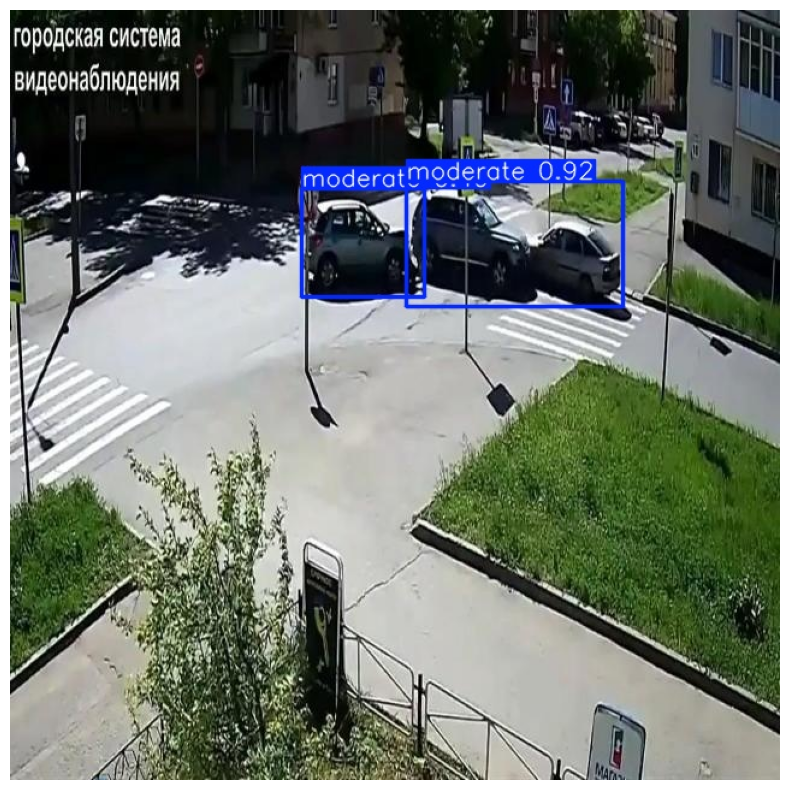

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = "/content/runs/detect/predict/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

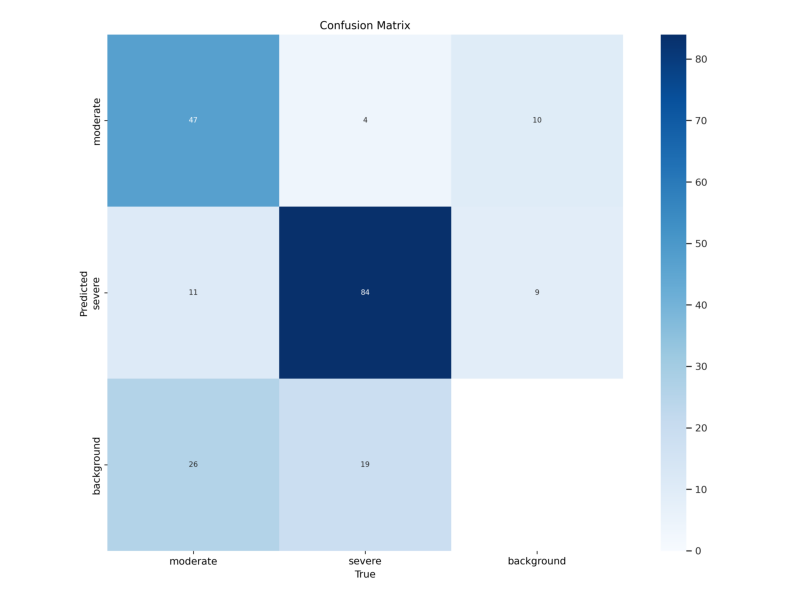

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/val2/confusion_matrix.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


#**Conf=0.5**


In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
metrics = model.val(imgsz=640, conf=0.5)

print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]


                   all        186        189      0.877      0.637       0.77      0.626
              moderate         66         66      0.838       0.47      0.673      0.535
                severe        120        123      0.917      0.805      0.866      0.716
Speed: 0.4ms preprocess, 25.8ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/val3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc98c9cbf70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     

In [ ]:
model.val(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", split='test', imgsz=640, conf=0.5)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/test/labels.cache... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.83it/s]


                   all        184        191      0.838      0.607      0.754      0.622
              moderate         84         84      0.816      0.476      0.671      0.553
                severe        100        107      0.859      0.738      0.838      0.691
Speed: 0.4ms preprocess, 26.3ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/val4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc98de8f160>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.predict(source="/content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg", save=True, conf=0.5)


image 1/1 /content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg: 640x640 1 moderate, 37.0ms
Speed: 4.4ms preprocess, 37.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'moderate', 1: 'severe'}
 obb: None
 orig_img: array([[[  0,  19,   0],
         [  1,  23,   4],
         [  5,  27,   9],
         ...,
         [ 81,  75,  62],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  2,  24,   5],
         [  4,  26,   7],
         [  6,  28,  10],
         ...,
         [ 80,  74,  61],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  5,  27,   9],
         [  3,  25,   7],
         [  5,  24,   7],
         ...,
         [ 80,  74,  63],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        ...,
 
        [[139, 144, 145],
         [158, 163, 164],
         [176, 181, 182],
         ...,
         [152, 165, 167],
         [153, 166, 168],
         [153, 166, 168]],
 
        [[161, 166, 167],
         [170, 175, 176],
         [179, 184, 185],
         ...,
   

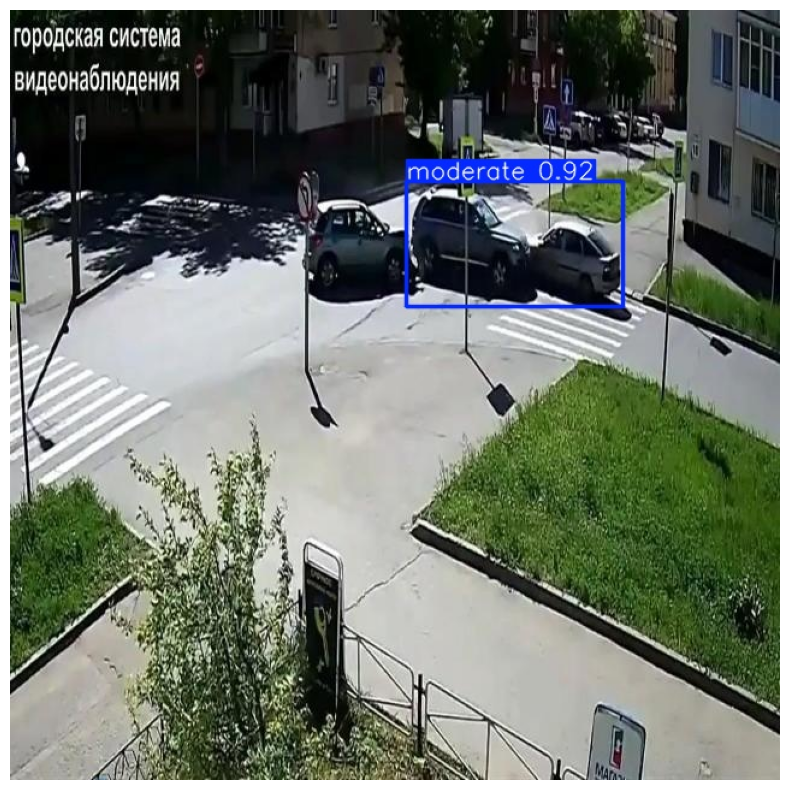

In [ ]:
import cv2
import matplotlib.pyplot as plt


image_path = "/content/runs/detect/predict2/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

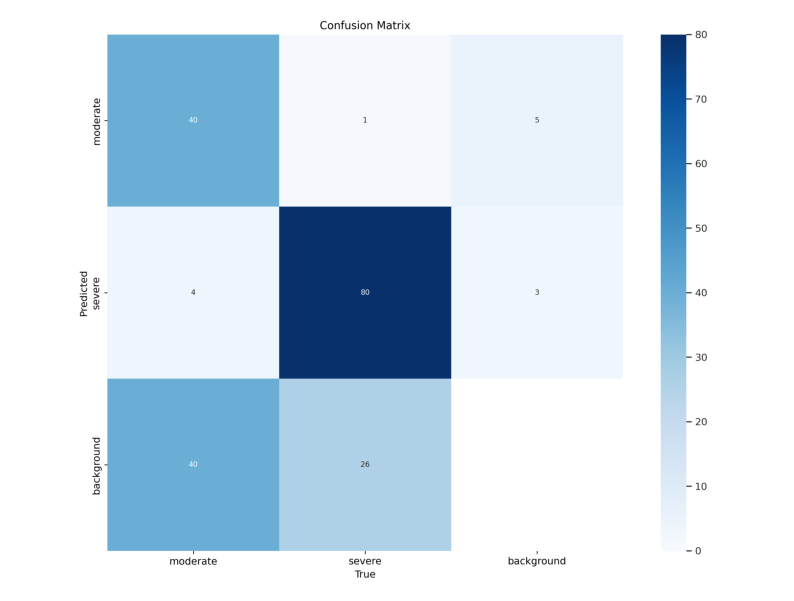

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/val4/confusion_matrix.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


# **Conf=0.75**

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
metrics = model.val(imgsz=640, conf=0.75)

print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.91it/s]


                   all        186        189      0.916      0.484       0.71      0.611
              moderate         66         66      0.913      0.318      0.626      0.541
                severe        120        123       0.92       0.65      0.795       0.68
Speed: 0.3ms preprocess, 25.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val5
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc98cae5810>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     

In [ ]:
model.val(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", split='test', imgsz=640, conf=0.75)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/test/labels.cache... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.43it/s]


                   all        184        191      0.925      0.519      0.733      0.616
              moderate         84         84      0.917      0.393      0.661      0.547
                severe        100        107      0.932      0.645      0.805      0.684
Speed: 0.3ms preprocess, 27.3ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/val6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc975075de0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.predict(source="/content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg", save=True, conf=0.75)


image 1/1 /content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg: 640x640 1 moderate, 37.3ms
Speed: 3.0ms preprocess, 37.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'moderate', 1: 'severe'}
 obb: None
 orig_img: array([[[  0,  19,   0],
         [  1,  23,   4],
         [  5,  27,   9],
         ...,
         [ 81,  75,  62],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  2,  24,   5],
         [  4,  26,   7],
         [  6,  28,  10],
         ...,
         [ 80,  74,  61],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  5,  27,   9],
         [  3,  25,   7],
         [  5,  24,   7],
         ...,
         [ 80,  74,  63],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        ...,
 
        [[139, 144, 145],
         [158, 163, 164],
         [176, 181, 182],
         ...,
         [152, 165, 167],
         [153, 166, 168],
         [153, 166, 168]],
 
        [[161, 166, 167],
         [170, 175, 176],
         [179, 184, 185],
         ...,
   

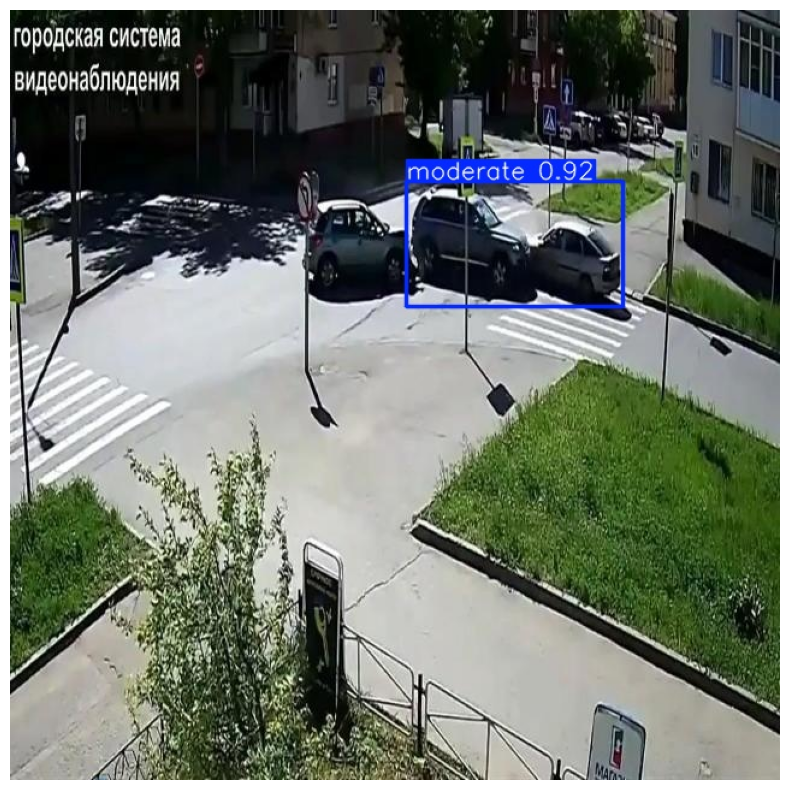

In [ ]:
import cv2
import matplotlib.pyplot as plt


image_path = "/content/runs/detect/predict3/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

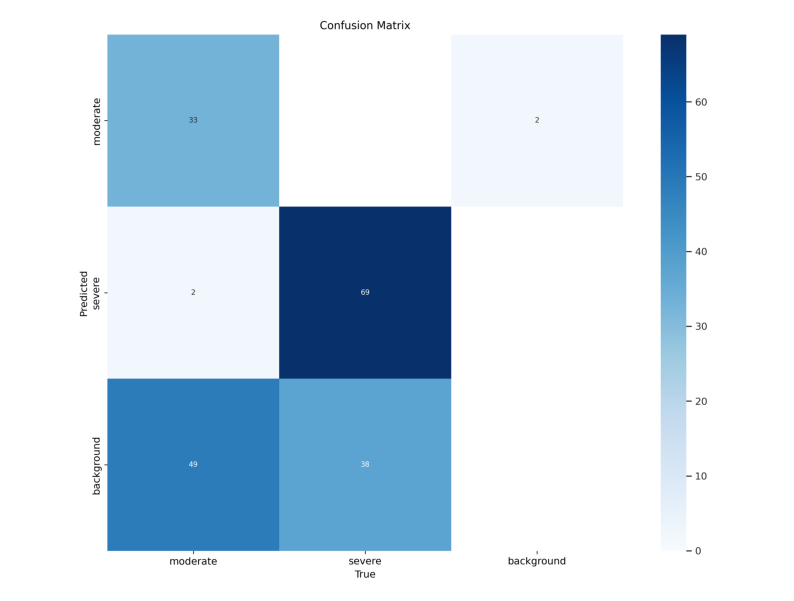

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/val6/confusion_matrix.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
import shutil

shutil.make_archive('runs', 'zip', '/content/runs')


'/content/runs.zip'

In [ ]:
from google.colab import files

files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>